In [47]:
import bs4 as bs
import urllib.request
import nltk
import spacy
import matplotlib.pyplot as plt

In [48]:
pln = spacy.load('pt_core_news_sm')
pln

In [49]:
document = pln("Estou aprendendo processamento de linguagem natural, curso em Curitiba")

In [50]:
type(document)

spacy.tokens.doc.Doc

In [51]:
for token in document:
    print(token.text,token.pos_)

Estou AUX
aprendendo VERB
processamento NOUN
de ADP
linguagem NOUN
natural ADJ
, PUNCT
curso NOUN
em ADP
Curitiba PROPN


In [52]:
for token in document:
    print(token.text,token.lemma_)

Estou estar
aprendendo aprender
processamento processamento
de de
linguagem linguagem
natural natural
, ,
curso curso
em em
Curitiba Curitiba


In [53]:
doc=pln('encontrei encontraram encontrarão encontrariam cursando curso cursei')
[token.lemma_ for token in doc]

['encontrar',
 'encontrar',
 'encontrar',
 'encontrariar',
 'cursar',
 'curso',
 'cursar']

In [54]:
nltk.download('rslp')

[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\mbern\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

In [55]:
stemmer = nltk.stem.RSLPStemmer()
stemmer.stem('aprendendo')

'aprend'

In [56]:
for token in document:
    print(token.text,token.lemma_,stemmer.stem(token.text))

Estou estar est
aprendendo aprender aprend
processamento processamento process
de de de
linguagem linguagem lingu
natural natural natur
, , ,
curso curso curs
em em em
Curitiba Curitiba curitib


In [57]:
data = urllib.request.urlopen('https://pt.wikipedia.org/wiki/Intelig%C3%AAncia_artificial')

In [58]:
data = data.read()
data

b'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-toc-available" lang="pt" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>Intelig\xc3\xaancia artificial \xe2\x80\x93 Wikip\xc3\xa9dia, a enciclop\xc3\xa9dia livre</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-me

In [ ]:
data_html = bs.BeautifulSoup(data,'lxml')
data_html

In [60]:
paragrafs = data_html.find_all('p')

In [61]:
len(paragrafs)

64

In [62]:
paragrafs[0]

<p>A <b>inteligência artificial</b> (de sigla: <b>IA</b>; do <a href="/wiki/L%C3%ADngua_inglesa" title="Língua inglesa">inglês</a>: <i>artificial intelligence</i>, de sigla: <b>AI</b>) é um campo de estudo multidisciplinar que abrange varias áreas do conhecimento.<sup class="reference" id="cite_ref-:0_1-0"><a href="#cite_note-:0-1"><span>[</span>1<span>]</span></a></sup><sup class="reference" id="cite_ref-:1_2-0"><a href="#cite_note-:1-2"><span>[</span>2<span>]</span></a></sup> É também um conjunto de <a href="/wiki/Tecnologias_emergentes" title="Tecnologias emergentes">novas tecnologias</a> que permitem aos aparelhos smart executarem várias funções avançadas de modo quase autônomo,<sup class="reference" id="cite_ref-:1_2-1"><a href="#cite_note-:1-2"><span>[</span>2<span>]</span></a></sup><sup class="reference" id="cite_ref-:2_3-0"><a href="#cite_note-:2-3"><span>[</span>3<span>]</span></a></sup> representando um <a href="/wiki/Revolu%C3%A7%C3%A3o_da_informa%C3%A7%C3%A3o" title="Revolu

In [63]:
paragrafs[1].text

'Algumas das principais áreas relacionadas à IA incluem:\n'

In [64]:
conteudo = ''
for p in paragrafs:
    conteudo+=p.text

In [65]:
conteudo

'A inteligência artificial (de sigla: IA; do inglês: artificial intelligence, de sigla: AI) é um campo de estudo multidisciplinar que abrange varias áreas do conhecimento.[1][2] É também um conjunto de novas tecnologias que permitem aos aparelhos smart executarem várias funções avançadas de modo quase autônomo,[2][3] representando um marco histórico na computação moderna.[3] Embora seu desenvolvimento tenha avançado mais na ciência da computação, sua abordagem interdisciplinar envolve contribuições de diversas disciplina.\nAlgumas das principais áreas relacionadas à IA incluem:\nÉ difícil definir especificamente a Inteligência Artificial, mas ao longo do tempo seguiu essas quatro linhas de pensamento:[1]\nÉ um conceito amplo e que recebe tantas definições quanto significados diferentes à palavra inteligência.[4] É possível considerar algumas características básicas desses sistemas, como a capacidade de raciocínio (aplicar regras lógicas a um conjunto de dados disponíveis para chegar a 

In [66]:
conteudo = conteudo.lower()

In [67]:
conteudo

'a inteligência artificial (de sigla: ia; do inglês: artificial intelligence, de sigla: ai) é um campo de estudo multidisciplinar que abrange varias áreas do conhecimento.[1][2] é também um conjunto de novas tecnologias que permitem aos aparelhos smart executarem várias funções avançadas de modo quase autônomo,[2][3] representando um marco histórico na computação moderna.[3] embora seu desenvolvimento tenha avançado mais na ciência da computação, sua abordagem interdisciplinar envolve contribuições de diversas disciplina.\nalgumas das principais áreas relacionadas à ia incluem:\né difícil definir especificamente a inteligência artificial, mas ao longo do tempo seguiu essas quatro linhas de pensamento:[1]\né um conceito amplo e que recebe tantas definições quanto significados diferentes à palavra inteligência.[4] é possível considerar algumas características básicas desses sistemas, como a capacidade de raciocínio (aplicar regras lógicas a um conjunto de dados disponíveis para chegar a 

In [68]:
pln_search = spacy.load('pt_core_news_sm')
pln_search

In [69]:
string = 'turing'
token_searching = pln_search(string)
token_searching

turing

In [70]:
from spacy.matcher import PhraseMatcher

In [71]:
matcher = PhraseMatcher(pln_search.vocab)

In [72]:
matcher.add('Search',None,token_searching)

In [73]:
doc= pln_search(conteudo)

In [74]:
matches = matcher(doc)

In [75]:
matches

[(10439048276818773896, 3463, 3464),
 (10439048276818773896, 3473, 3474),
 (10439048276818773896, 3629, 3630),
 (10439048276818773896, 3634, 3635),
 (10439048276818773896, 3640, 3641),
 (10439048276818773896, 3703, 3704),
 (10439048276818773896, 4356, 4357),
 (10439048276818773896, 5573, 5574),
 (10439048276818773896, 5708, 5709),
 (10439048276818773896, 5803, 5804),
 (10439048276818773896, 5920, 5921)]

In [76]:
doc[3463:3464],doc[3463-5:3464+5]

(turing, uma contribuição prática de alan turing foi o que se chamou)

In [77]:
matches[0],matches[0][1], matches[0][2]

((10439048276818773896, 3463, 3464), 3463, 3464)

In [78]:
from IPython.core.display import HTML
number_words =50

In [79]:
doc = pln_search(conteudo)
matches = matcher(doc)

display(HTML(f'<h1>{string.upper()}</h1>'))
display(HTML(f"""<p><strong>Results finded:</strong>{len(matches)}</p>"""))

In [80]:
text=''
for i in matches:
    start = i[1]-number_words
    if start <0:
        start = 0
    text += str(doc[start:i[1]+number_words]).replace(string,f"<mark>{string}</mark>")
    text +="<br /> <br />"

display(HTML(f"""...{text}..."""))

In [81]:
for entity in doc.ents:
    print(entity.text,entity.label_)

pensamento:[1 MISC
segunda guerra mundial MISC
alan PER
herbert simon PER
allen newell PER
john mccarthy PER
warren mcculloch PER
walter pitts PER
marvin minsky PER
frankenstein MISC
aristóteles PER
alexandre PER
herbert simon PER
john mccarthy PER
newell PER
“ PER
” MISC
humano.[14 MISC
brasil LOC
allen newell PER
herbert simon PER
marvin minsky PER
mit ORG
lab MISC
defense advanced research MISC
estados unidos LOC
fifth generation MISC
” MISC
japão LOC
prolog MISC
google ORG
wikipédia MISC
john mccarthy PER
racionalmente".[18][25 MISC
andreas kaplan PER
michael haenlein PER
john mccarthy PER
román LOC
john haugeland PER
w. grey walter PER
johns hopkins PER
universidade de princeton ORG
ratio club LOC
inglaterra LOC
david rumelhart PER
isaac asimov PER
steven spielberg PER
alan turing PER
turing PER
turing PER
turing PER
tommy flowers PER
joseph weizenbaum PER
mit ORG
internet computer entity MISC
internet MISC
java MISC
intelligence markup language PER
alicebots LOC
programáveis.[35]

In [82]:
from spacy import displacy

displacy.render(doc,style='ent',jupyter=True)

In [83]:
from matplotlib.colors import ListedColormap
from spacy.lang.pt.stop_words import STOP_WORDS
color_map = ListedColormap(['red','orange','green','magenta'])
pln.vocab['usb'].is_stop

False

In [84]:
doc = pln_search(conteudo)
list_token=[]
for token in doc:
    list_token.append(token.text)

In [85]:
list_token
len(list_token)

6316

In [86]:
no_stop_word =[]
for word in list_token:
    if pln.vocab[word].is_stop ==False:
        no_stop_word.append(word)

In [87]:
no_stop_word
len(no_stop_word)

3652

In [88]:
from wordcloud import WordCloud

In [89]:
cloud = WordCloud(background_color='white',max_words=100,colormap=color_map)


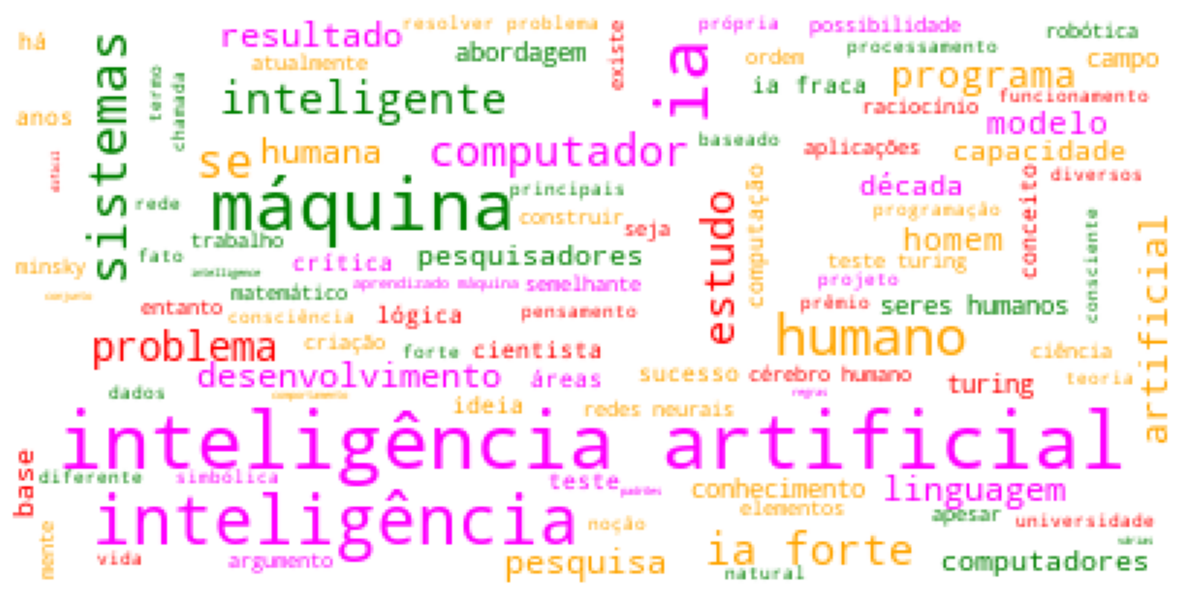

In [90]:
cloud = cloud.generate(' '.join(no_stop_word))
plt.figure(figsize=(15,15))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [91]:
punctuation = string.punctuation()
punctuation

AttributeError: 'str' object has no attribute 'punctuation'